## BSDS 1:1 REMEDIAL TEST MARKING GUIDE

## SECTION A: Contains multiple questions that contribute 20 Marks to the test.

**1. Which of the following is true about a correlation analysis?**
- It is a univariate analysis

**2. Which of the following techniques is an analysis of the relationship between two variables to help provide the prediction mechanism?**
- Regression

**3. What is the meaning of the testing of the hypothesis?**
- It is a rule for acceptance or rejection of the hypothesis of the research problem

**4. The independent variable is used to explain the dependent variable in:**
- Linear regression analysis

**5. Choose the least likely assumption of a classic normal linear regression model?**
- The independent variable is normally distributed

**6. Which supervised learning algorithm is known for its ability to handle both classification and regression tasks?**
- Random Forest

**7. The main objective of a classification algorithm in supervised learning is to:**
- Assign input data to predefined categories or classes

**8. Which data analysis is concerned with steps and actions to be taken in the future to obtain a specific outcome?**
- Prescriptive data analysis

**9. Which of the following actions identifies data properties?**
- Data mining

**10. Which of these is not the Meta character of Regex in data analytics?**
- hashatag(#)

## SECTION B: Section contains essay questions that contribute 20 marks to the test.

**Q11: Suppose you want to develop a machine learning algorithm that predicts the number of views on the articles in a blog.Your data analysis is based on features like author name, number of articles written by the same author, etc. Which evaluation metrics would you use in that case and why?**

- 1. Mean Absolute Error (MAE):
Measures the average absolute difference between the predicted and actual number of views.
Useful for understanding the magnitude of errors in predictions.

- 2. Mean Squared Error (MSE):
Calculates the average squared difference between predicted and actual values. Often used as a loss function during model training.

- 3. Root Mean Squared Error (RMSE):
The square root of MSE.
Brings the error units back to the original scale of the target variable (number of views). Easier to interpret than MSE.

- 4. R-squared (R²):
Measures the proportion of variance in the dependent variable (number of views) explained by the independent variables (features).
Higher R² indicates a better fit of the model to the data.

**Q12: Suppose you had bank transaction data, and wanted to separate out likely fraudulent transactions. How would you approach it?**

- 1. Data Cleaning (handling outliers, missing data, duplicates)
- 2. Feature selection: Select variables that are strongly correlated to the target variable (e.g. type of transactions)
- 3. Model selection (use of unsupervised learning models like K-means clustering, or supervised classification models like Decision tree classifier, SVM, Random forest)
- 4. Model training: Training the model with the 70-80% of the data and test the model using the remaining 20-30% of the data. The model is trained to learn patterns associated with fraud transaction. 
- 5. Model validation: Test the model by generation accuracy scores and use it to make predictions using a different dataset (testing data)
- 6. Model saving: Save the model as a pickle or joblib for future deployment and automation

**Q13: Explain standard deviation and variance, and where they apply?**

- Variance and Standard Deviation are statistical measures that help us quantify the spread or dispersion of data points
- Variance measures how far, on average, each data point is from the mean.
- Standard Deviation is the square root of the variance
- Both measures are widely used in fields of finance, statistics, science etc.  

**Q14: What is the difference between K nearest neighbours and K means? Describe scenarios where the two algorithms would apply.**

- KNN is a supervised learning algorithm used for classification and regression tasks while K-Means is an unsupervised learning algorithm used for clustering.
- KNN requires data labels while K-Means doesn't
- KNN is used to predict the class or value of a new data point based on its similarity to labeled training data, while K-Means is used to discover underlying patterns in unlabeled data by grouping similar data points together.

## SECTION C: Practical Section.
* The codes used in this marking guide are not strictly the only way to answer the questions and alternative correct codes/graphs will be awarded marks
* Marks are awarded not just for results but for explanations too

**Q15: Using the Bike_Sales.xlsx dataset, answer the following questions**

In [1]:
#Libaries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mat
import matplotlib.pyplot as plt
import scipy.stats
from scipy.stats import chi2_contingency
import association_metrics as am

# modeling libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Import dataset
data = pd.read_excel("Bike_Sales.xlsx")

#View the dataframe
data

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2017-01-01,1,January,2017,17,Youth (<25),M,Canada,British Columbia,Bikes,Road Bikes,"Road-250 Red, 44",2,1519,2443,1848,3038,4886
1,2017-01-01,1,January,2017,23,Youth (<25),M,Australia,Victoria,Bikes,Mountain Bikes,"Mountain-200 Black, 46",2,1252,2295,2086,2504,4590
2,2017-01-01,1,January,2017,33,Young Adults (25-34),F,France,Yveline,Bikes,Road Bikes,"Road-150 Red, 48",2,2171,3578,2814,4342,7156
3,2017-01-01,1,January,2017,39,Adults (35-64),M,United States,Washington,Bikes,Road Bikes,"Road-550-W Yellow, 38",2,713,1120,814,1426,2240
4,2017-01-01,1,January,2017,42,Adults (35-64),M,United States,California,Bikes,Road Bikes,"Road-750 Black, 44",2,344,540,392,688,1080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113031,2021-12-31,31,December,2021,52,Adults (35-64),F,United Kingdom,England,Bikes,Road Bikes,"Road-250 Black, 58",2,1555,2443,1776,3110,4886
113032,2021-12-31,31,December,2021,25,Young Adults (25-34),F,Germany,Hessen,Bikes,Road Bikes,"Road-550-W Yellow, 38",1,713,1120,407,713,1120
113033,2021-12-31,31,December,2021,26,Young Adults (25-34),M,Australia,Queensland,Bikes,Road Bikes,"Road-550-W Yellow, 42",1,713,1120,407,713,1120
113034,2021-12-31,31,December,2021,33,Young Adults (25-34),F,Australia,New South Wales,Bikes,Mountain Bikes,"Mountain-200 Black, 38",1,1252,2295,1043,1252,2295


In [3]:
#data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Date              113036 non-null  datetime64[ns]
 1   Day               113036 non-null  int64         
 2   Month             113036 non-null  object        
 3   Year              113036 non-null  int64         
 4   Customer_Age      113036 non-null  int64         
 5   Age_Group         113036 non-null  object        
 6   Customer_Gender   113036 non-null  object        
 7   Country           113036 non-null  object        
 8   State             113036 non-null  object        
 9   Product_Category  113036 non-null  object        
 10  Sub_Category      113036 non-null  object        
 11  Product           113036 non-null  object        
 12  Order_Quantity    113036 non-null  int64         
 13  Unit_Cost         113036 non-null  int64         
 14  Unit

**A. Which variables are key determinants in the type of "Product" a client buys? [30 Marks]**

**i. Feature selection**

In [4]:
#Subset variables
cat = ['Month', 'Age_Group', 'Customer_Gender', 'Country', 'State', 'Product_Category', 'Sub_Category', 'Product']
cont = ['Day', 'Year', 'Customer_Age', 'Order_Quantity', 'Unit_Cost', 'Unit_Price', 'Profit', 'Cost', 'Revenue']

In [5]:
#Feature selection
#Encode the target variable Product
#Generate a new dataframe to be encoded
data_cleaned_encoded = data
# Initialize LabelEncoder
from sklearn.preprocessing import StandardScaler, LabelEncoder
label_encoder = LabelEncoder()

# Encode the predictor variables (Product_Category)
for col in cat:
    data_cleaned_encoded[col] = label_encoder.fit_transform(data_cleaned_encoded[col])

In [6]:
#Relationship between continuous variables and the target Product
#Using ANOVA
def FunctionAnova(inpData, TargetVariable, ContinuousPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in ContinuousPredictorList:
        CategoryGroupLists=inpData.groupby(predictor)[TargetVariable].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [7]:
#Using the function to check which continuous variables are correlated with target
ContinuousPredictorList=['Year', 'Customer_Age', 'Order_Quantity', 'Unit_Cost', 'Unit_Price', 'Profit', 'Cost', 'Revenue']
FunctionAnova(inpData=data_cleaned_encoded, 
              TargetVariable='Product', 
              ContinuousPredictorList=ContinuousPredictorList)

##### ANOVA Results ##### 

Year is correlated with Product | P-Value: 7.732548428634922e-10
Customer_Age is correlated with Product | P-Value: 1.514752306674122e-78
Order_Quantity is correlated with Product | P-Value: 3.3363518735413826e-120
Unit_Cost is correlated with Product | P-Value: 0.0
Unit_Price is correlated with Product | P-Value: 0.0
Profit is correlated with Product | P-Value: 0.0
Cost is correlated with Product | P-Value: 0.0
Revenue is correlated with Product | P-Value: 0.0


['Year',
 'Customer_Age',
 'Order_Quantity',
 'Unit_Cost',
 'Unit_Price',
 'Profit',
 'Cost',
 'Revenue']

In [8]:
#Relationship between the categorical variables and the target Product using a chisquare analysis
# Writing a function to find the correlation of all categorical variables with the Target variable
def FunctionChisq(inpData, TargetVariable, CategoricalVariablesList):
    from scipy.stats import chi2_contingency
    
    # Creating an empty list of final selected predictors
    SelectedPredictors=[]

    for predictor in CategoricalVariablesList:
        CrossTabResult=pd.crosstab(index=inpData[TargetVariable], columns=inpData[predictor])
        ChiSqResult = chi2_contingency(CrossTabResult)
        
        # If the ChiSq P-Value is <0.05, that means we reject H0
        if (ChiSqResult[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])        
            
    return(SelectedPredictors)

In [9]:
#Use the function to calculate chisquare
CategoricalVariables=['Month', 'Customer_Gender', 'Country', 'State', 'Age_Group', 'Sub_Category', 'Product_Category']

# Calling the function
FunctionChisq(inpData=data_cleaned_encoded, 
              TargetVariable='Product',
              CategoricalVariablesList= CategoricalVariables)

Month is correlated with Product | P-Value: 1.1214391406404777e-275
Customer_Gender is correlated with Product | P-Value: 3.1965252248914403e-249
Country is correlated with Product | P-Value: 0.0
State is correlated with Product | P-Value: 0.0
Age_Group is correlated with Product | P-Value: 0.0
Sub_Category is correlated with Product | P-Value: 0.0
Product_Category is correlated with Product | P-Value: 0.0


['Month',
 'Customer_Gender',
 'Country',
 'State',
 'Age_Group',
 'Sub_Category',
 'Product_Category']

- All variables except for date are correlated with the Product

**ii. Feature importance**

In [12]:
#Data for ML (Drop useless columns e.g. Date)
data_cleaned_encoded = data_cleaned_encoded.drop('Date', axis=1)
data_cleaned_encoded

,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,1,4,2017,17,3,1,1,5,1,11,66,2,1519,2443,1848,3038,4886
1,1,4,2017,23,3,1,0,48,1,10,34,2,1252,2295,2086,2504,4590
2,1,4,2017,33,2,0,2,52,1,11,58,2,2171,3578,2814,4342,7156
3,1,4,2017,39,0,1,5,50,1,11,74,2,713,1120,814,1426,2240
4,1,4,2017,42,0,1,5,6,1,11,91,2,344,540,392,688,1080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113031,31,2,2021,52,0,0,4,8,1,11,65,2,1555,2443,1776,3110,4886
113032,31,2,2021,25,2,0,3,15,1,11,74,1,713,1120,407,713,1120
113033,31,2,2021,26,2,1,0,35,1,11,76,1,713,1120,407,713,1120
113034,31,2,2021,33,2,0,0,26,1,10,32,1,1252,2295,1043,1252,2295


In [13]:
#Define X and y 
#Split data in to target (y) and predictors (x)
Predictors=['Day', 'Year', 'Customer_Age', 'Order_Quantity', 'Unit_Cost', 'Unit_Price', 'Profit', 'Cost', 'Revenue', 
        'Month', 'Customer_Gender', 'Country', 'State', 'Product_Category', 'Sub_Category', 'Product', 'Age_Group']
# Predictor variable
X = data_cleaned_encoded.drop('Product', axis=1)

# target variable:
y = data_cleaned_encoded['Product']

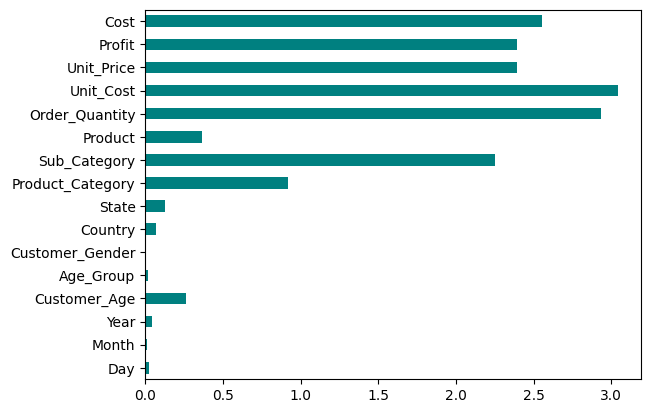

In [14]:
#Check for importance of each variables
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
%matplotlib inline

importances = mutual_info_classif(X, y)
feat_importances = pd.Series(importances, data_cleaned_encoded.columns[0:len(data_cleaned_encoded.columns)-1])
feat_importances.plot(kind='barh', color = 'teal')
plt.show()

- The most important variables in predicting the Product are Unit_Cost, followed by Order_Quantity and Cost.
- The least important are Customer_Gender, Month, Day and Year

**B. Generate a machine learning algorithm for the variable "Product" [30 Marks]**
- Grades awarded for all classification models e.g. Decision Tree, Random Forest, SVM, Logistic regression etc

In [15]:
# Building the model
import sklearn
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

#Fit data to the model
# train the model
model.fit(X, y)

DecisionTreeClassifier()

In [16]:
# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [17]:
from sklearn.metrics import accuracy_score
#Check accuracy of model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

prediction = model.predict(X_test)
 
score = accuracy_score(y_test, prediction)
score

0.9428504025242547

In [19]:
#Check the prediction of the model
#Predict the response for test dataset (30%)
y_pred = model.predict(X_test)
#view result
y_pred

array([  4, 126, 126, ...,  52, 126,  37])

In [20]:
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9428504025242547


In [21]:
#Generate a classification report
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
print(f'Classification Report: \n{classification_report(y_test, y_pred)}')

Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1313
           1       1.00      1.00      1.00       127
           2       1.00      1.00      1.00       549
           3       0.84      0.89      0.86        81
           4       0.85      0.75      0.80        91
           5       0.74      0.79      0.77        91
           6       1.00      1.00      1.00      1180
           7       1.00      1.00      1.00       559
           8       1.00      1.00      1.00       322
           9       0.88      0.86      0.87       273
          10       0.84      0.80      0.82       250
          11       0.85      0.90      0.87       305
          12       1.00      1.00      1.00       173
          13       0.99      1.00      1.00       393
          14       1.00      1.00      1.00       237
          15       1.00      1.00      1.00       519
          16       0.88      0.87      0.87       275
   

- A decision tree classifier algorithm was generated that has a 94.28% accuracy level at classifying and predicting the Product labels

**Q16: Using the Bike_Sales.xlsx dataset, answer the following questions**

**A. Which variables are key determinants in the "Revenue" generated? [30 Marks]**

**i. Feature selection**

In [22]:
#Relationship between Revenue and continuous variables
CorrelationData=data_cleaned_encoded[cont].corr()
CorrelationData

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
Day,1.000000,-0.005653,-0.014296,-0.002412,0.003133,0.003207,0.004831,0.003329,0.003970
Year,-0.005653,1.000000,0.029033,0.028546,-0.071266,-0.070575,-0.024058,-0.028013,-0.026670
Customer_Age,-0.014296,0.029033,1.000000,0.026887,-0.021374,-0.020262,-0.006998,-0.016013,-0.012505
Order_Quantity,-0.002412,0.028546,0.026887,1.000000,-0.515835,-0.515925,-0.268903,-0.340382,-0.314561
Unit_Cost,0.003133,-0.071266,-0.021374,-0.515835,1.000000,0.997894,0.788331,0.829869,0.820789
Unit_Price,0.003207,-0.070575,-0.020262,-0.515925,0.997894,1.000000,0.795308,0.826301,0.821468
Profit,0.004831,-0.024058,-0.006998,-0.268903,0.788331,0.795308,1.000000,0.961552,0.986170
Cost,0.003329,-0.028013,-0.016013,-0.340382,0.829869,0.826301,0.961552,1.000000,0.993769
Revenue,0.003970,-0.026670,-0.012505,-0.314561,0.820789,0.821468,0.986170,0.993769,1.000000


- Selecting variables with a moderate to high correlation with Revenue
- Therefore variables Order_Quantity, Unit_Cost, Unit_Price, Profit and Cost

In [25]:
#Relationship between categorical variables and Revenue
#Using the function to check which continuous variables are correlated with target
ContinuousPredictorList=data_cleaned_encoded[cat]
FunctionAnova(inpData=data_cleaned_encoded, 
              TargetVariable='Revenue', 
              ContinuousPredictorList=ContinuousPredictorList)

##### ANOVA Results ##### 

Month is correlated with Revenue | P-Value: 1.8004708919680668e-17
Age_Group is correlated with Revenue | P-Value: 4.6360932075956945e-37
Customer_Gender is correlated with Revenue | P-Value: 0.0018278269946536293
Country is correlated with Revenue | P-Value: 2.4522321975218486e-245
State is correlated with Revenue | P-Value: 4.273826163493405e-236
Product_Category is correlated with Revenue | P-Value: 0.0
Sub_Category is correlated with Revenue | P-Value: 0.0
Product is correlated with Revenue | P-Value: 0.0


['Month',
 'Age_Group',
 'Customer_Gender',
 'Country',
 'State',
 'Product_Category',
 'Sub_Category',
 'Product']

- ['Month','Age_Group','Customer_Gender','Country','State', 'Product_Category','Sub_Category','Product'] are correlated with Revenue

**ii. Feature importance**

In [34]:
#Define predictors and target (Revenue) 
#Split data in to target (y) and predictors (x)
Predictors=['Order_Quantity', 'Unit_Cost', 'Unit_Price', 'Profit', 'Cost', 'Month', 'Age_Group', 
            'Customer_Gender', 'Country', 'State', 'Product_Category', 'Sub_Category', 'Product', 'Revenue']
# Predictor variable
X = data_cleaned_encoded.drop('Revenue', axis=1)

# target variable:
y = data_cleaned_encoded['Revenue']

In [36]:
# Split the data into training and test sets (By 70% for training, 30% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [37]:
# Import necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

In [38]:
#Fit the model to the target and predictor, and select key features
lr = LinearRegression()

sfs = SFS(lr,
          k_features='best',
          verbose=1,
          scoring='r2',
          cv=5,
          n_jobs=-1)

sfs = sfs.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is de

In [41]:
pd.DataFrame.from_dict(sfs.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(15,)","[0.986910320480561, 0.9881974150672272, 0.9874...",0.987465,"(Cost,)",0.000536,0.000417,0.000208
2,"(14, 15)","[1.0, 1.0, 1.0, 1.0, 1.0]",1.0,"(Profit, Cost)",0.0,0.0,0.0
3,"(0, 14, 15)","[1.0, 1.0, 1.0, 1.0, 1.0]",1.0,"(Day, Profit, Cost)",0.0,0.0,0.0
4,"(0, 1, 14, 15)","[1.0, 1.0, 1.0, 1.0, 1.0]",1.0,"(Day, Month, Profit, Cost)",0.0,0.0,0.0
5,"(0, 1, 2, 14, 15)","[1.0, 1.0, 1.0, 1.0, 1.0]",1.0,"(Day, Month, Year, Profit, Cost)",0.0,0.0,0.0
6,"(0, 1, 2, 3, 14, 15)","[1.0, 1.0, 1.0, 1.0, 1.0]",1.0,"(Day, Month, Year, Customer_Age, Profit, Cost)",0.0,0.0,0.0
7,"(0, 1, 2, 3, 4, 14, 15)","[1.0, 1.0, 1.0, 1.0, 1.0]",1.0,"(Day, Month, Year, Customer_Age, Age_Group, Pr...",0.0,0.0,0.0
8,"(0, 1, 2, 3, 4, 5, 14, 15)","[1.0, 1.0, 1.0, 1.0, 1.0]",1.0,"(Day, Month, Year, Customer_Age, Age_Group, Cu...",0.0,0.0,0.0
9,"(0, 1, 2, 3, 4, 5, 6, 14, 15)","[1.0, 1.0, 1.0, 1.0, 1.0]",1.0,"(Day, Month, Year, Customer_Age, Age_Group, Cu...",0.0,0.0,0.0
10,"(0, 1, 2, 3, 4, 5, 6, 7, 14, 15)","[1.0, 1.0, 1.0, 1.0, 1.0]",1.0,"(Day, Month, Year, Customer_Age, Age_Group, Cu...",0.0,0.0,0.0


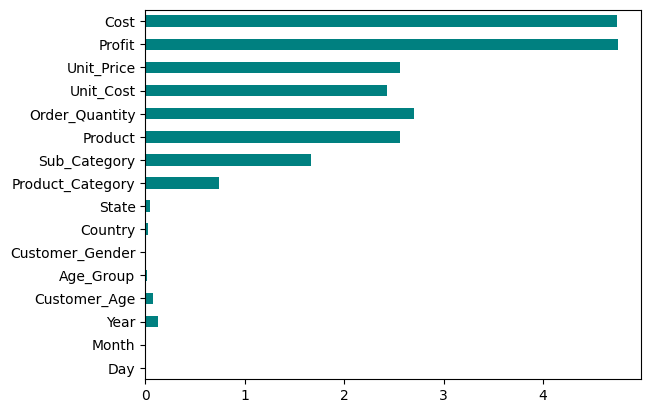

In [42]:
#Alternatively
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
%matplotlib inline

importances = mutual_info_classif(X, y)
feat_importances = pd.Series(importances, data_cleaned_encoded.columns[0:len(data_cleaned_encoded.columns)-1])
feat_importances.plot(kind='barh', color = 'teal')
plt.show()

- Shows the information gain or importance of each predictor variable
- Key variables are in determining Revenue are Cost and Profit

**B. Generate a machine learning model that can be used to predict "Revenue". [30 Marks]**

In [45]:
#Libraries for ML regressor algorithms
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
#List the regressor algorithms or just chose to use one
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(random_state=42),
    "Random Forest Regressor": RandomForestRegressor(random_state=42),
}

In [46]:
# Function to evaluate and print model performance
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    return mae, mse, rmse, r2

#USe the function to evaulate each algorithm
# Evaluate each model
results = {}
for name, model in models.items():
    mae, mse, rmse, r2 = evaluate_model(model, X_train, X_test, y_train, y_test)
    results[name] = {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R²': r2}

# Print results
for name, metrics in results.items():
    print(f"{name}:")
    print(f"  MAE: {metrics['MAE']:.2f}")
    print(f"  MSE: {metrics['MSE']:.2f}")
    print(f"  RMSE: {metrics['RMSE']:.2f}")
    print(f"  R²: {metrics['R²']:.2f}\n")

Linear Regression:
  MAE: 0.00
  MSE: 0.00
  RMSE: 0.00
  R²: 1.00

Decision Tree Regressor:
  MAE: 0.14
  MSE: 670.54
  RMSE: 25.89
  R²: 1.00

Random Forest Regressor:
  MAE: 0.70
  MSE: 16216.80
  RMSE: 127.35
  R²: 0.99



- The Linear regressionnmodel is the most accurate (R2=100%,) and has the lowest mean squared error (mse = 0, rmse = 0).

In [47]:
# Saving the  model as a joblib
#Pickles and Joblib saved models allow for automation of the model in Machine Learning
import joblib
joblib.dump(LinearRegression(), 'Revenue_predictor.joblib')
print("Model saved as Linear Regressor Model called 'Revenue_predictor.joblib'.")

Model saved as Linear Regressor Model called 'Revenue_predictor.joblib'.
